# Assesment for Final Project - Classification

<B> Problem Statement: </B>

In this assessment, we would like to create a machine learning model that can predict loan default.

We will focus on accuracy of the machine learning model.

The data has 700 good and 300 bad credits with 20 predictor variables. Data from 1973 to 1975.

In [60]:
# import all required libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# For classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


## About Data

The dataset is from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29


The dataset contains the following features:

<p>
Column name: laufkont
Variable name: status
Content: status of the debtor's checking account with the bank (categorical)

Column name: laufzeit
Variable name: duration
Content: credit duration in months (quantitative)

Column name: moral
Variable name: credit_history
Content: history of compliance with previous or concurrent credit contracts (categorical)

Column name: verw
Variable name: purpose
Content: purpose for which the credit is needed (categorical)

Column name: hoehe
Variable name: amount
Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

Column name: sparkont
Variable name: savings
Content: debtor's savings (categorical)

Column name: beszeit
Variable name: employment_duration
Content: duration of debtor's employment with current employer (ordinal; discretized quantitative)

Column name: rate
Variable name: installment_rate
Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)

Column name: famges
Variable name: personal_status_sex
Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories

Column name: buerge
Variable name: other_debtors
Content: Is there another debtor or a guarantor for the credit? (categorical)

Column name: wohnzeit
Variable name: present_residence
Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

Column name: verm
Variable name: property
Content: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)

Column name: alter
Variable name: age
Content: age in years (quantitative)

Column name: weitkred
Variable name: other_installment_plans
Content: installment plans from providers other than the credit-giving bank (categorical)

Column name: wohn
Variable name: housing
Content: type of housing the debtor lives in (categorical)

Column name: bishkred
Variable name: number_credits
Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.

Column name: beruf
Variable name: job
Content: quality of debtor's job (ordinal)

Column name: pers
Variable name: people_liable
Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)

Column name: telef
Variable name: telephone
Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

Column name: gastarb
Variable name: foreign_worker
Content: Is the debtor a foreign worker? (binary)

Column name: kredit
Variable name: credit_risk
Content: Has the credit contract been complied with (good) or not (bad) ? (binary)
</p>

In [2]:
os.chdir('data')
# read csv file seperated by space
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')

In [3]:
data.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [4]:
# we have read the data headers in german. We have to change the headers to english
col_rename = {'laufkont' : 'status', 'laufzeit': 'duration', 'moral': 'credit_history', 'verw': 'purpose', 'hoehe': 'amount', 'sparkont': 'savings', 'beszeit': 'employment_duration',
       'rate': 'installment_rate', 'famges': 'personal_status_sex', 'buerge': 'other_debtors', 'wohnzeit': 'present_residence', 'verm': 'property', 'alter': 'age', 'weitkred': 'other_installment_plans',
       'wohn': 'housing', 'bishkred': 'number_credits', 'beruf': 'job', 'pers': 'people_liable', 'telef': 'telephone', 'gastarb': 'foreign_worker', 'kredit': 'credit_risk'}

In [5]:
data.rename(columns=col_rename, inplace=True)
# we have changed the headers to english
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Exploratory Data Analysis

In this section we will explore the data and look for patterns in the data to analyze if the given data is a good for machine learning model creation.

1) Describe the data

2) Visualize the data

3) Identify the missing values and fill them

4) Identify the outliers and remove them

5) Identify the categorical variables and encode them (if any)

6) Identify the numerical variables and perform basic statistical analysis

In [6]:
# Lets see the data types of the columns and any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [7]:
# describe the data including object and numeric data
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


All the data in the dataset is encoded as numeric values. Later in our preprocessing we will encode it to appropriate data types.

In [8]:
# Check if there are any null columns
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

There is no missing values in the dataset. Good for machine learning model creation. No need of any imputation.

array([[<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'credit_history'}>,
        <AxesSubplot:title={'center':'purpose'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'savings'}>,
        <AxesSubplot:title={'center':'employment_duration'}>,
        <AxesSubplot:title={'center':'installment_rate'}>,
        <AxesSubplot:title={'center':'personal_status_sex'}>,
        <AxesSubplot:title={'center':'other_debtors'}>],
       [<AxesSubplot:title={'center':'present_residence'}>,
        <AxesSubplot:title={'center':'property'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'other_installment_plans'}>,
        <AxesSubplot:title={'center':'housing'}>],
       [<AxesSubplot:title={'center':'number_credits'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'people_liable'}>,
        <AxesSubplot

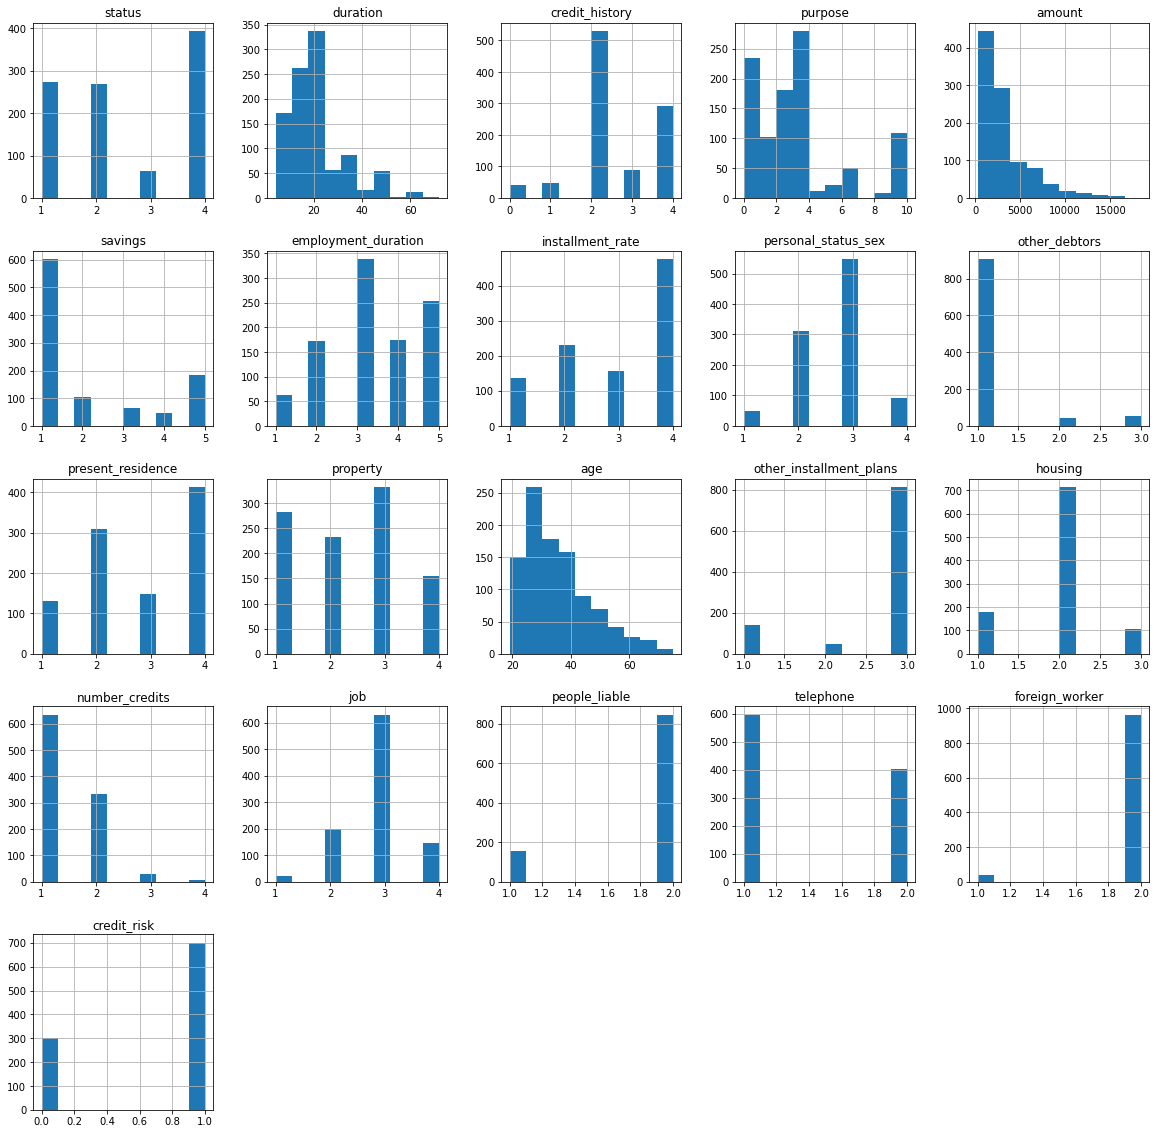

In [9]:
# Visualize the data in a histogram
data.hist(figsize=(20,20))

Before we move further with our analysis, we will change the columns to appropriate data types.

In [10]:
# Lets assign datatypes to the columns
data['status'] = data['status'].astype('category')
data['duration'] = data['duration'].astype('int64')
data['credit_history'] = data['credit_history'].astype('category')
data['purpose'] = data['purpose'].astype('category')
data['amount'] = data['amount'].astype('int64')
data['savings'] = data['savings'].astype('category')
data['employment_duration'] = data['employment_duration'].astype('category') # its an ordinal variable
data['installment_rate'] = data['installment_rate'].astype('float64') # its an ordinal variable
data['personal_status_sex'] = data['personal_status_sex'].astype('category')
data['other_debtors'] = data['other_debtors'].astype('category')
data['other_installment_plans'] = data['other_installment_plans'].astype('category')
data['housing'] = data['housing'].astype('category')
data['people_liable'] = data['people_liable'].astype('category') # its an binary variable
data['telephone'] = data['telephone'].astype('category') # its an binary variable
data['foreign_worker'] = data['foreign_worker'].astype('category') # its an binary variable
data['credit_risk'] = data['credit_risk'].astype('category') # its an binary variable

### Identify outliers in the data

array([[<AxesSubplot:title={'center':'age'}, xlabel='[credit_risk]'>,
        <AxesSubplot:title={'center':'amount'}, xlabel='[credit_risk]'>,
        <AxesSubplot:title={'center':'duration'}, xlabel='[credit_risk]'>],
       [<AxesSubplot:title={'center':'installment_rate'}, xlabel='[credit_risk]'>,
        <AxesSubplot:title={'center':'job'}, xlabel='[credit_risk]'>,
        <AxesSubplot:title={'center':'number_credits'}, xlabel='[credit_risk]'>],
       [<AxesSubplot:title={'center':'present_residence'}, xlabel='[credit_risk]'>,
        <AxesSubplot:title={'center':'property'}, xlabel='[credit_risk]'>,
        <AxesSubplot:>]], dtype=object)

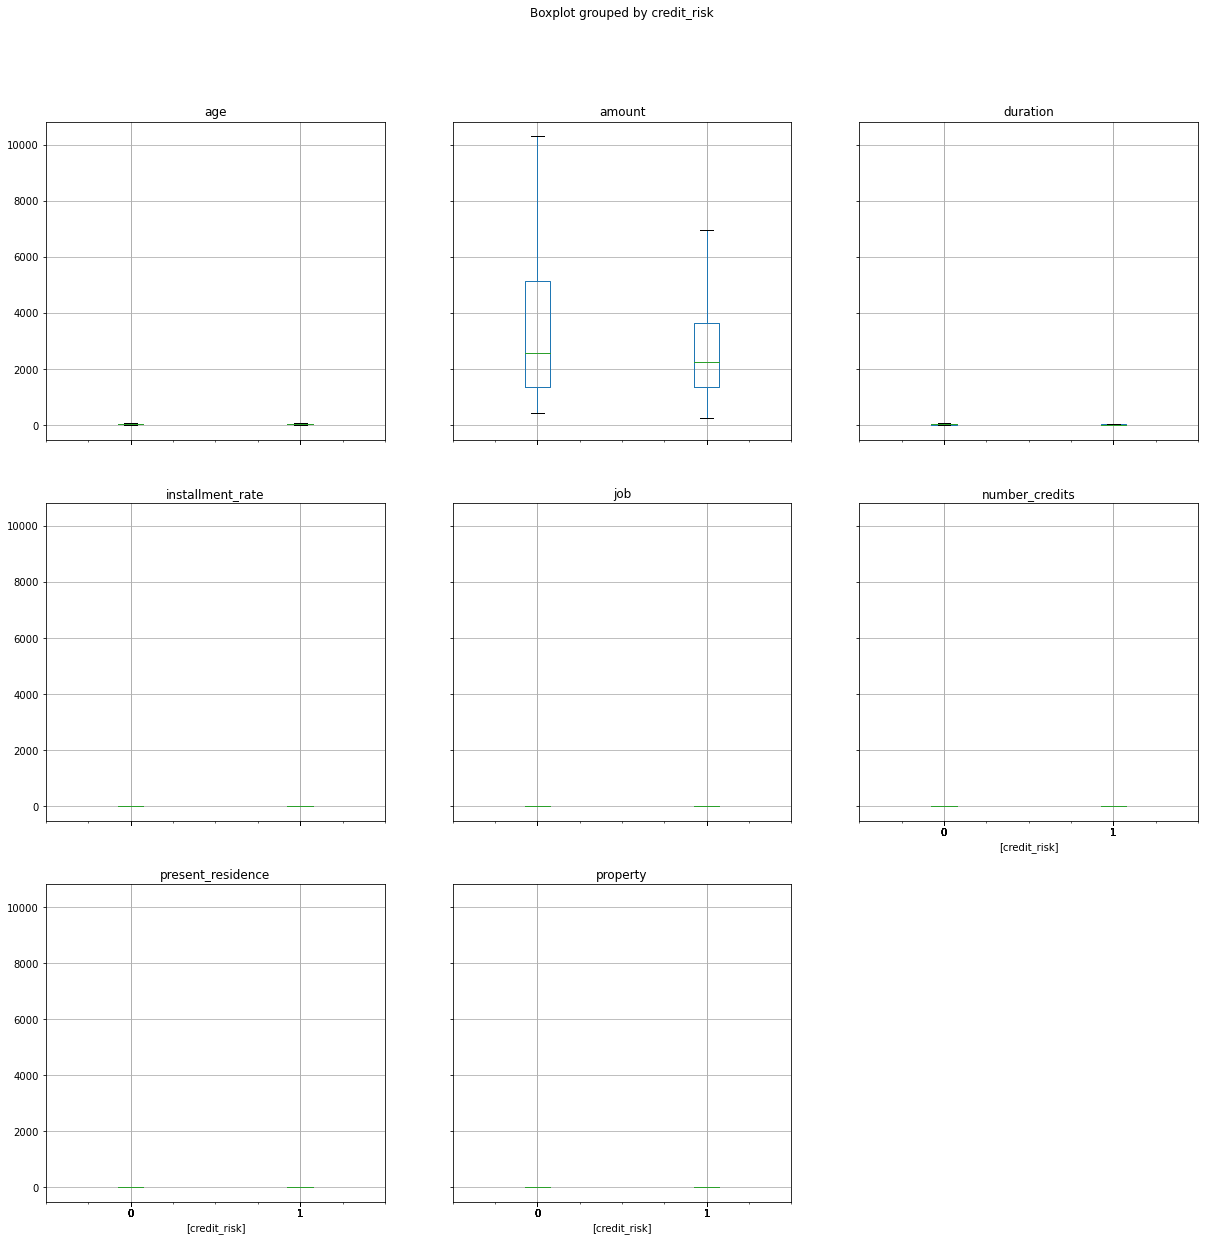

In [11]:
# check outliers
data.boxplot(by="credit_risk", showfliers=False, figsize=(20,20)) # credit_risk is the target variable


### Identify corrleation between variables

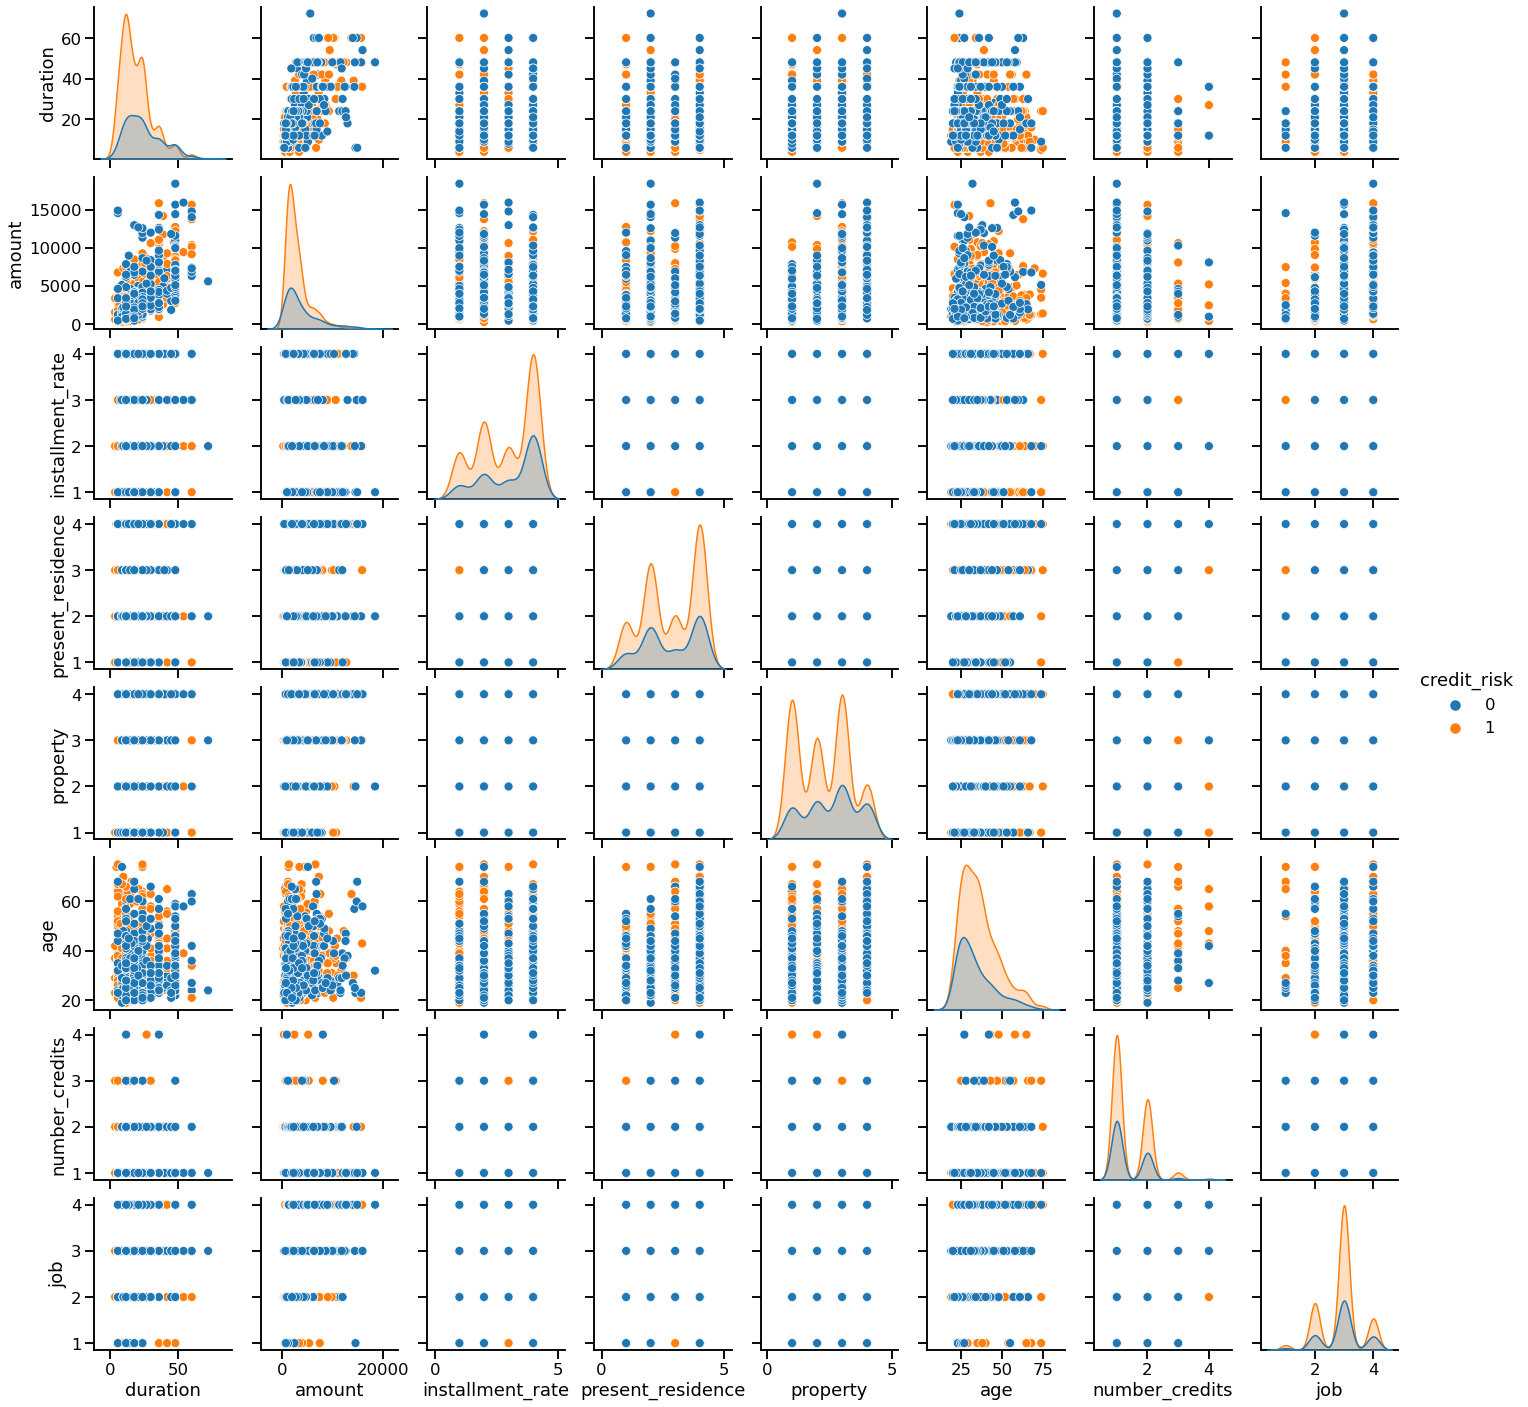

In [12]:
sns.set_context('talk')
sns.pairplot(data, hue='credit_risk')
# plt.show()

List of features: Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


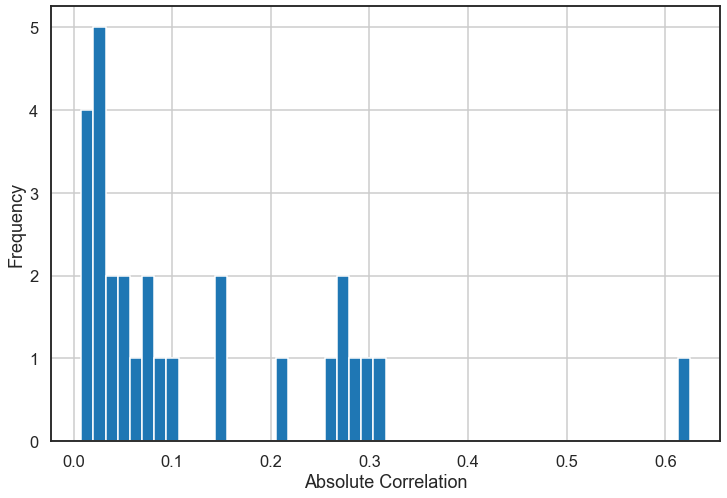

In [13]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
print('List of features: {}'.format(feature_cols))
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [14]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation


### Identify skweness in the data

In [15]:
# identify skewness
mask = data.dtypes == np.float64
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

print('Number of skewed columns :', skew_cols.shape[0])
skew_cols

Number of skewed columns : 0


,Skew


### Lets see the distribution of our target variable - Credit Risk

In [16]:
data.credit_risk.value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

### Findiangs & Actions to be taken on the data

1. We need to normalization the data.
2. We already changed the data to appropriate datatype
3. There are no missing values in the dataset.
4. There are no outliers in the dataset.
5. There is no skewness in the dataset.
6. There is no correlation between the variables.

In [17]:
# Validate the data after assigning datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment_duration      1000 non-null   category
 7   installment_rate         1000 non-null   float64 
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  present_residence        1000 non-null   int64   
 11  property                 1000 non-null   int64   
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

## Data Preprocessing

Lets segregate the data into categorical , numerical variables , binary variables and ordinal variables.

In [18]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
status,4
duration,33
credit_history,5
purpose,10
amount,923
savings,5
employment_duration,5
installment_rate,4
personal_status_sex,4


In [19]:
list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)

['status',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job']

In [20]:
# Lets identify binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
# Lets identify categorical variables
categorical_variables = list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)


In [21]:
# From the data dictornary we know list of Ordinal variables
ordinal_variables = ['installment_rate', 'present_residence', 'property','number_credits','job']
# Lets find the numerical variables
numerical_variables = list(set(data.columns) - set(binary_variables) - set(categorical_variables) - set(ordinal_variables))

In [22]:
print('Binary variables: {}'.format(binary_variables))
print('Categorical variables: {}'.format(categorical_variables))
print('Numerical variables: {}'.format(numerical_variables))
print('Ordinal variables: {}'.format(ordinal_variables))

Binary variables: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Categorical variables: ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job']
Numerical variables: ['age', 'amount', 'duration']
Ordinal variables: ['installment_rate', 'present_residence', 'property', 'number_credits', 'job']


In [23]:
# Check if there any common variables between the three categories
print('Common variables between binary, categorical,numerical and ordinal: {}'.format(set(binary_variables).intersection(set(categorical_variables).intersection(set(numerical_variables))).intersection(set(ordinal_variables))))

Common variables between binary, categorical,numerical and ordinal: set()


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

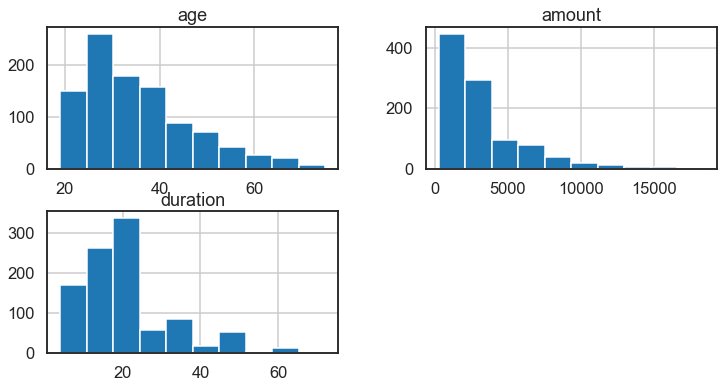

In [24]:
data[numerical_variables].hist(figsize=(12, 6))

## Data Preprocessing

In [25]:
lb, le = LabelBinarizer(), LabelEncoder()
# Encode the ordinal variables
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])

# Encode the binary variables
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)

In [26]:
# Lets scale the numerical variables
scaler = MinMaxScaler()
data[numerical_variables] = scaler.fit_transform(data[numerical_variables])

In [27]:
data.head()

,duration,amount,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,...,other_debtors_3,status_2,status_3,status_4,credit_history_1,credit_history_2,credit_history_3,credit_history_4,housing_2,housing_3
0,0.205882,0.043964,3,3,1,0.035714,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.073529,0.140255,1,1,0,0.303571,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.117647,0.032519,1,3,0,0.071429,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0.117647,0.103004,2,1,0,0.357143,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.117647,0.105700,3,3,1,0.339286,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0


## Train Test Split prepration

In [28]:
X, y = data.drop('credit_risk', axis=1), data['credit_risk']
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Our Data set is 70% positive and 30% negative. Lets validate after splitting
print('Positive samples in training set: {}'.format(y_train.value_counts(normalize=True)[1]))
print('Negative samples in training set: {}'.format(y_train.value_counts(normalize=True)[0]))

print('Positive samples in test set: {}'.format(y_test.value_counts(normalize=True)[1]))
print('Negative samples in test set: {}'.format(y_test.value_counts(normalize=True)[0]))

Positive samples in training set: 0.7028571428571428
Negative samples in training set: 0.29714285714285715
Positive samples in test set: 0.6933333333333334
Negative samples in test set: 0.30666666666666664


With Simple traintest split we have correctly splitted the data 70-30. We dont need to use StratifiedShuffleSplit at this stage.

In [30]:
# utility function to report best scores
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

## KNN Classifier

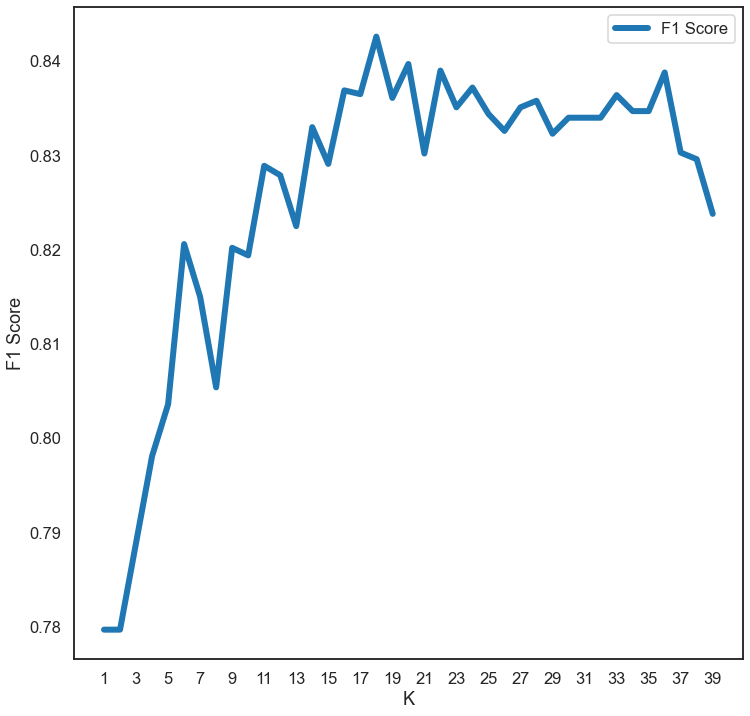

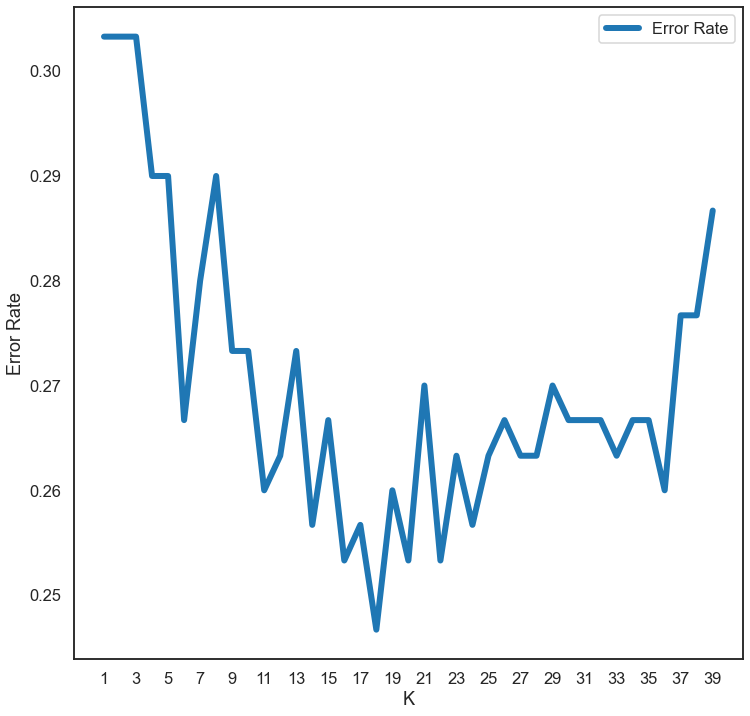

In [31]:
# Estimate KNN model and report outcomes
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#Plot the F1 score and error rate
sns.set_style('white')
sns.set_context('talk')
ax = f1_results.set_index('K').plot( figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));

ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))

In [32]:
display(f1_results.sort_values('F1 Score', ascending=False).head())

,K,F1 Score
17,18,0.8426
19,20,0.8397
21,22,0.8390
35,36,0.8388
23,24,0.8372


From the above analysis, K = 18 is the best value for KNN.

In [33]:
#Lets create final KNN Model with best K
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.65      0.14      0.23        92
           1       0.72      0.97      0.82       208

    accuracy                           0.71       300
   macro avg       0.68      0.55      0.53       300
weighted avg       0.70      0.71      0.64       300

Accuracy score:  0.71
F1 Score:  0.82


## SVM Classifier

In [34]:
kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.65      0.14      0.23        92
           1       0.72      0.97      0.82       208

    accuracy                           0.71       300
   macro avg       0.68      0.55      0.53       300
weighted avg       0.70      0.71      0.64       300

Accuracy score:  0.71
F1 Score:  0.82


In [35]:
X_transformed = nystroem.fit_transform(X_train)
sgd.fit(X_transformed, y_train)
X_test_transformed = nystroem.transform(X_test)
y_pred_svm_scaled = sgd.predict(X_test_transformed)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.65      0.14      0.23        92
           1       0.72      0.97      0.82       208

    accuracy                           0.71       300
   macro avg       0.68      0.55      0.53       300
weighted avg       0.70      0.71      0.64       300

Accuracy score:  0.71
F1 Score:  0.82


There are no difference in using nystroem 

## Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_test, y_test_pred, 'Decision Tree'),
                                   measure_error(y_test, y_pred_knn, 'KNN'),
                                   measure_error(y_test, y_pred_svm, 'SVM'),
                                   measure_error(y_test, y_pred_svm_scaled, 'SVM Scaled')],
                              axis=1)
train_test_full_error

,Decision Tree,KNN,SVM,SVM Scaled
accuracy,0.670000,0.753333,0.720000,0.763333
precision,0.755869,0.755725,0.723022,0.827751
recall,0.774038,0.951923,0.966346,0.831731
f1,0.764846,0.842553,0.827160,0.829736


In [37]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='f1',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)
print(GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth)
y_test_pred_gr = GR.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                   , measure_error(y_test, y_test_pred_gr, 'Decision Tree Grid Search')],
                                   axis=1)
train_test_full_error

3 1


,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333
precision,0.755869,0.755725,0.723022,0.827751,0.693333
recall,0.774038,0.951923,0.966346,0.831731,1.000000
f1,0.764846,0.842553,0.827160,0.829736,0.818898


## Random Forest Classifier

In [38]:
# Ramdom Forest Classifier CV
grid_params = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500,600, 700, 800, 900, 1000],}
RFCV = GridSearchCV(RandomForestClassifier(random_state=42, warm_start=True),
                    param_grid=grid_params,
                    scoring='f1',
                    n_jobs=-1)
RFCV = RFCV.fit(X_train, y_train)
print(RFCV.best_estimator_)
y_test_pred_rfcv = RFCV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                      , measure_error(y_test, y_test_pred_rfcv, 'Random Forest CV')],
                                        axis=1)
train_test_full_error

RandomForestClassifier(n_estimators=200, random_state=42, warm_start=True)


,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461


## Extra Trees Classifier

In [39]:
ETCV = GridSearchCV(ExtraTreesClassifier(random_state=42, warm_start=True),
                    param_grid=grid_params,
                    scoring='f1',
                    n_jobs=-1)
ETCV = ETCV.fit(X_train, y_train)
print(ETCV.best_estimator_)
y_test_pred_etcv = ETCV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_etcv, 'Extra Trees CV')],
                                        axis=1)
train_test_full_error

ExtraTreesClassifier(n_estimators=150, random_state=42, warm_start=True)


,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV,Extra Trees CV
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000,0.723333
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591,0.763713
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423,0.870192
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461,0.813483


## Gradient Boosting Classifier

In [40]:
# The parameters to be fit
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500,600, 700, 800, 900, 1000],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}
# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='f1',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)
# print the best parameters
print(GV_GBC.best_params_)
y_test_pred_gbc = GV_GBC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_gbc, 'Gradient Boosting Classifier')],
                                        axis=1)
train_test_full_error

{'learning_rate': 0.01, 'max_features': 4, 'n_estimators': 1000, 'subsample': 0.5}


,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV,Extra Trees CV,Gradient Boosting Classifier
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000,0.723333,0.753333
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591,0.763713,0.786325
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423,0.870192,0.884615
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461,0.813483,0.832579


## AdaBoost Classifier

In [42]:
# The parameters to be fit
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500,600, 700, 800, 900, 1000],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],}
# The grid search object
GV_ABC = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=42),
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
GV_ABC = GV_ABC.fit(X_train, y_train)
# print the best parameters
print(GV_ABC.best_params_)
y_test_pred_abc = GV_ABC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_abc, 'AdaBoost Classifier')],
                                        axis=1)
train_test_full_error

{'learning_rate': 0.01, 'n_estimators': 900}


,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV,Extra Trees CV,Gradient Boosting Classifier,AdaBoost Classifier
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000,0.723333,0.753333,0.756667
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591,0.763713,0.786325,0.789700
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423,0.870192,0.884615,0.884615
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461,0.813483,0.832579,0.834467


## Stackings Classifier

In [46]:
# Lets try to stack the models
# We can stake Decision Tree, KNN, SVM,  Random Forest, Gradient Boosting and AdaBoost Classifier on top of each other
estimators = [('knn',knn),('dt',GR), ('gbc', GV_GBC), ('rfcv', RFCV), ('etcv', ETCV), ('abc', GV_ABC)]
VC = VotingClassifier(estimators, voting='soft')
# this will run for ~10 mins. Be patient
VC = VC.fit(X_train, y_train)
# print the best parameters
print(VC.estimators_)
y_test_pred_vc = VC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_vc, 'Voting Classifier')],
                                        axis=1)
train_test_full_error

[KNeighborsClassifier(n_neighbors=18, weights='distance'), GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 17, 2),
                         'max_features': range(1, 45)},
             scoring='f1'), GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400, 500, 600, 700, 800, 900,
                                          1000],
                         'subsample': [1.0, 0.5]},
             scoring='f1'), GridSearchCV(estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400, 500, 60

,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV,Extra Trees CV,Gradient Boosting Classifier,AdaBoost Classifier,Voting Classifier
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000,0.723333,0.753333,0.756667,0.733333
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591,0.763713,0.786325,0.789700,0.744275
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423,0.870192,0.884615,0.884615,0.937500
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461,0.813483,0.832579,0.834467,0.829787


In [51]:
stackingClassifier = StackingClassifier(estimators=estimators,
                                    final_estimator=LogisticRegression(solver='lbfgs', random_state=42))
stackingClassifier = stackingClassifier.fit(X_train, y_train)
y_test_pred_stacking = stackingClassifier.predict(X_test)
# print the best parameters
print(stackingClassifier.estimators_)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_stacking, 'Stacking Classifier')],
                                        axis=1)
train_test_full_error

[KNeighborsClassifier(n_neighbors=18, weights='distance'), GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 17, 2),
                         'max_features': range(1, 45)},
             scoring='f1'), GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400, 500, 600, 700, 800, 900,
                                          1000],
                         'subsample': [1.0, 0.5]},
             scoring='f1'), GridSearchCV(estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400, 500, 60

,Decision Tree,KNN,SVM,SVM Scaled,Decision Tree Grid Search,Random Forest CV,Extra Trees CV,Gradient Boosting Classifier,AdaBoost Classifier,Voting Classifier,Stacking Classifier
accuracy,0.670000,0.753333,0.720000,0.763333,0.693333,0.750000,0.723333,0.753333,0.756667,0.733333,0.760000
precision,0.755869,0.755725,0.723022,0.827751,0.693333,0.780591,0.763713,0.786325,0.789700,0.744275,0.783333
recall,0.774038,0.951923,0.966346,0.831731,1.000000,0.889423,0.870192,0.884615,0.884615,0.937500,0.903846
f1,0.764846,0.842553,0.827160,0.829736,0.818898,0.831461,0.813483,0.832579,0.834467,0.829787,0.839286


## XGBoost Classifier

In [55]:
# Lets try with XGBoost Classifier
# The parameters to be fit
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500,600, 700, 800, 900, 1000],
                'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                'subsample': [1.0, 0.5],
                'max_features': [1, 2, 3, 4]}
# The grid search object
GV_XGB = GridSearchCV(XGBClassifier(random_state=42),
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
GV_XGB = GV_XGB.fit(X_train, y_train)
# print the best parameters
print(GV_XGB.best_params_)
y_test_pred_xgb = GV_XGB.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_xgb, 'XGBoost Classifier')],
                                        axis=1)
train_test_full_error

NameError: name 'XGBClassifier' is not defined

## CatBoost Classifier

In [61]:
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500,600, 700, 800, 900, 1000],
                'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
CB_CV = GridSearchCV(CatBoostClassifier(random_state=42),
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
CB_CV = CB_CV.fit(X_train, y_train)
# print the best parameters
print(CB_CV.best_params_)
y_test_pred_cb = CB_CV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_cb, 'CatBoost Classifier')],
                                        axis=1)
train_test_full_error

/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/catboost/core.py", line 4718, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/catboost/core.py", line 2029, in _fit
    callbacks=callbacks
  File "/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/catboost/core.py", line 1953,

TypeError: __init__() got an unexpected keyword argument 'max_features'